In [12]:
#
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 
# Load the data
gapminder_data = pd.read_csv("../data/gapminder.csv")
gapminder_data.head()

,country,continent,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314,NaN,NaN
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030,NaN,NaN
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710,NaN,NaN
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138,NaN,NaN
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106,NaN,NaN


In [14]:
# 
# Describe the data and data types in the csv
gapminder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1704 non-null   object 
 1   continent         1704 non-null   object 
 2   year              1704 non-null   int64  
 3   life_exp          1704 non-null   float64
 4   pop               1704 non-null   float64
 5   gdp_per_cap       1704 non-null   float64
 6   infant_mortality  1224 non-null   float64
 7   fertility         1330 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 106.6+ KB


In [15]:
# 
# Get basic statistics on the gapminders CSV
gapminder_data.describe()

,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1224.000000,1330.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,63.709665,4.407105
std,17.26533,12.917107,1.061579e+08,9857.454543,50.454764,2.084137
min,1952.00000,23.599000,6.001100e+04,241.165876,2.200000,0.920000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,18.700000,2.350000
50%,1979.50000,60.712500,7.023596e+06,3531.846988,52.550000,4.500000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,101.675000,6.347500
max,2007.00000,82.603000,1.318683e+09,113523.132900,226.000000,8.420000


# Data Visualization

## Scatter Plots

In [16]:
# 
# Latest date in data
gapminder_data['year'].max()

2007

In [17]:
# 
# Creating a sub-mask
# Extracting data for 2002
# gapminder_2002 = gapminder[gapminder['year'] == 2002]
# 
# OR
# 
# Create a mask 
mask_2002 = gapminder_data["year"] == 2002
# 
# Sub masking/ sub setting - Filter based on mask (extract a portion of the data based on a condition)
gapminder_2002 = gapminder_data[mask_2002]

In [18]:
# 
# Extract data using multiple conditions
# mask_2002_kenya = (gapminder_data['year'] == 2002) & (gapminder_data['country'] == 'Kenya')
# gapminder_data[mask_2002_kenya]
# 
# OR do the 2 steps above in one
gapminder_data[(gapminder_data['year'] == 2002) & (gapminder_data['country'] == 'Kenya')]

,country,continent,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
826,Kenya,Africa,2002,50.992,31386842.0,1287.514732,62.2,4.99


## Plotting

### Scatter Plot

Text(0.5, 1.0, 'Life expectancy as a function of GDP per capita for 2002')

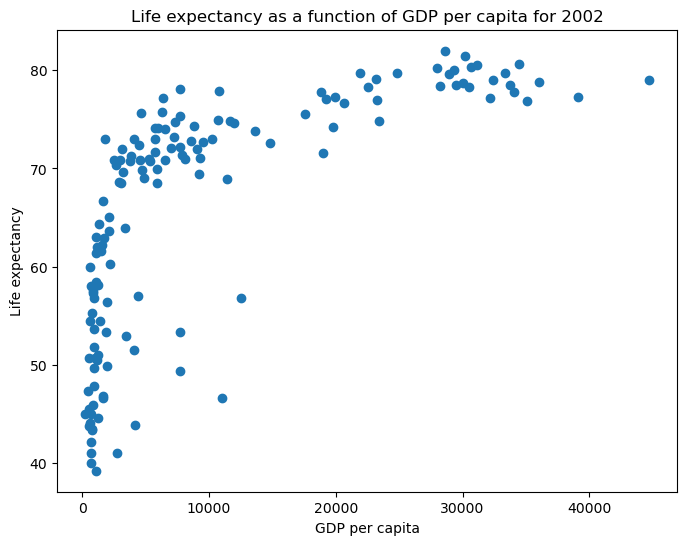

In [19]:
# 
# Scatter Plot showing the relationship between gdp per capita and life expectancy in the year 2002
# 
# create figure object and axes
fig, axes = plt.subplots(figsize = (8, 6))
gdp = gapminder_2002['gdp_per_cap']
life_exp = gapminder_2002['life_exp']
plt.scatter(gdp, life_exp)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")
plt.title("Life expectancy as a function of GDP per capita for 2002")

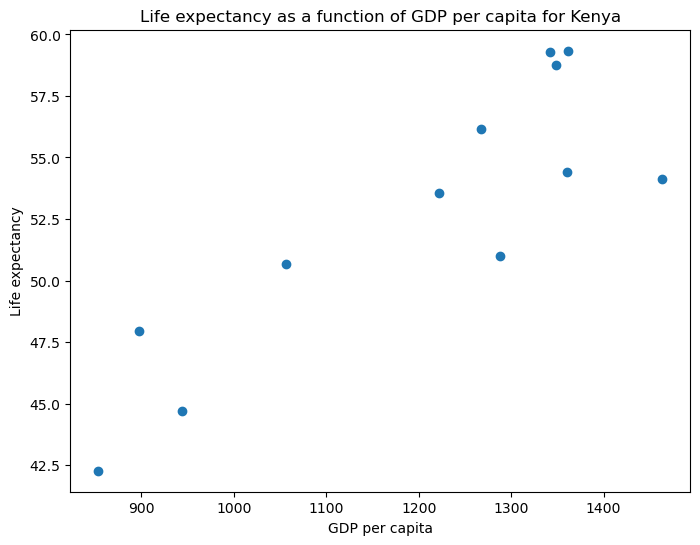

In [20]:
# 
# Scatter plot showing the relationship between gdp per capita and life expectancy in Kenya
kenya_mask = gapminder_data[gapminder_data['country'] == 'Kenya']
fig, axes = plt.subplots(figsize = (8, 6))
gdp = kenya_mask['gdp_per_cap']
life_exp = kenya_mask['life_exp']
plt.scatter(gdp, life_exp)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")
plt.title("Life expectancy as a function of GDP per capita for Kenya")
# 
# Saving the figure as a png image in outputs folder
plt.savefig("../data/outputs/kenya_gdp_life_expectancy.png")

## Plotting with Seaborn

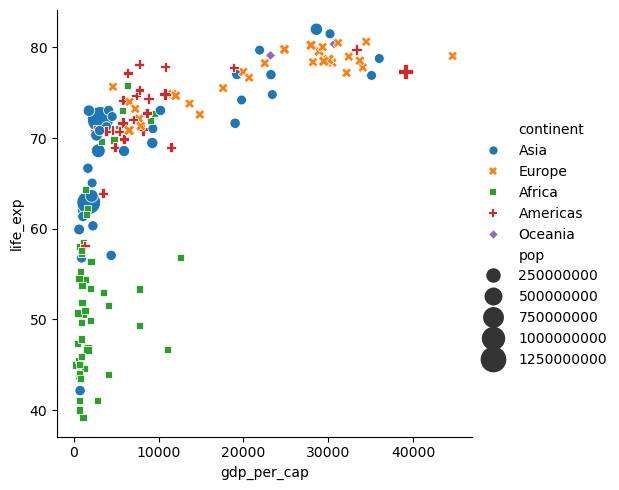

In [43]:
# 
# Apply default theme
# 
# Load dataset
gapminder_sns = pd.read_csv("../data/gapminder.csv")
# 
# Create visualization
sns.relplot(
    data = gapminder_2002,
    x = 'gdp_per_cap',
    y = 'life_exp',
    hue = 'continent',
    size = 'pop',
    style = 'continent',
    sizes = (50, 350)
)

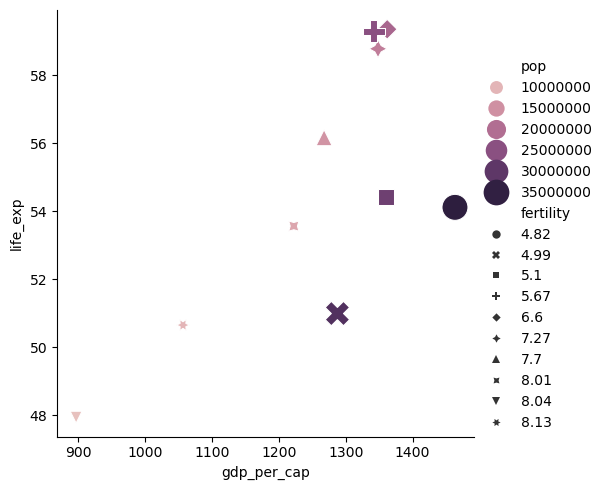

In [50]:
# 
# Apply default theme
# 
# Load dataset
gapminder_sns = pd.read_csv("../data/gapminder.csv")
# 
# Create visualization
sns.relplot(
    data = kenya_mask,
    x = 'gdp_per_cap',
    y = 'life_exp',
    hue = 'pop',
    size = 'pop',
    style = 'fertility',
    sizes = (50, 350)
)

In [57]:
# 
# Plotting a heat map
# kenya_mask_numeric_df = kenya_mask.select_dtypes(include='number')
# sns.heatmap(kenya_mask_numeric_df[['fertility']], annot=True, cmap='YlGnBu')
# plt.title("Life expectancy as a function of GDP per capita for Kenya")
# plt.show()